# COSC2753 - Assignment 2: Task 2 - RMIT University
**Paddy Variety Classification - CNN Basic**




In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Directory structure 
train_dir = 'train_images'
test_dir = 'test_images'

# Check class folders in train_images
class_names = sorted(os.listdir(train_dir))
print("Class folders detected:", class_names)


Class folders detected: ['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


In [3]:
# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    directory=train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 8330 images belonging to 10 classes.
Found 2077 images belonging to 10 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 150s 575ms/step - accuracy: 0.8890 - loss: 0.3345 - val_accuracy: 0.7959 - val_loss: 0.8488
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 145s 555ms/step - accuracy: 0.9063 - loss: 0.2745 - val_accuracy: 0.8166 - val_loss: 0.8139
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 172s 657ms/step - accuracy: 0.9251 - loss: 0.2275 - val_accuracy: 0.8156 - val_loss: 0.8558
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 93s 356ms/step - accuracy: 0.9393 - loss: 0.1859 - val_accuracy: 0.8175 - val_loss: 0.9555


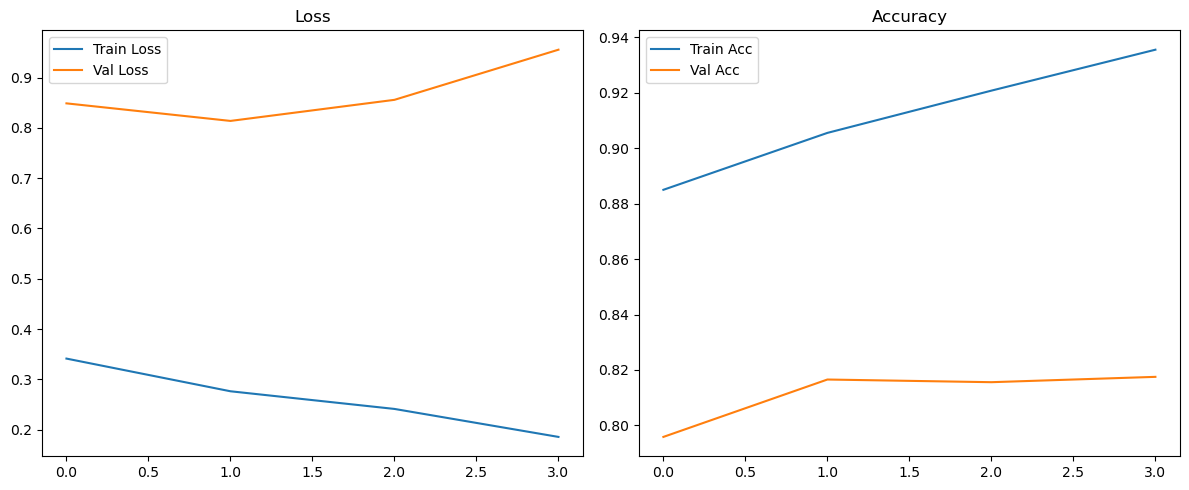

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()


In [ ]:
# # Prediction step
# test_datagen = ImageDataGenerator(rescale=1./255)

# test_gen = test_datagen.flow_from_directory(
#     directory='.',
#     classes=['test_images'],
#     target_size=IMG_SIZE,
#     batch_size=1,
#     class_mode=None,
#     shuffle=False
# )

# # Predict
# predictions = model.predict(test_gen)
# predicted_class_indices = np.argmax(predictions, axis=1)

# # Map back to class labels
# labels = (train_gen.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# predicted_labels = [labels[k] for k in predicted_class_indices]

# # Build submission
# submission = pd.DataFrame({
#     'image_id': [os.path.basename(f) for f in test_gen.filenames],
#     'variety': predicted_labels
# })

# submission.to_csv("prediction_submission.csv", index=False)
# print("Saved: prediction_submission.csv")
